In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
%matplotlib inline
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [3]:
X,y = make_regression(n_samples=100,n_features=1,random_state=42,noise=5)

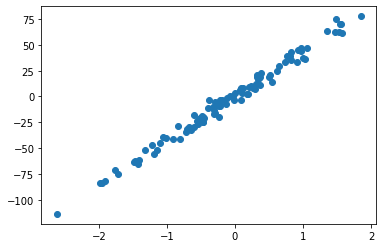

In [5]:
plt.scatter(X,y)

In [6]:
X = tf.constant(X.flatten(),dtype=np.float64)
y = tf.constant(y,dtype=np.float64)

In [17]:
NUM_EXAMPLES = 100
intercept = 2
X = tf.random.normal([NUM_EXAMPLES])
noise = tf.random.normal([NUM_EXAMPLES])
y = X*3 + intercept + noise

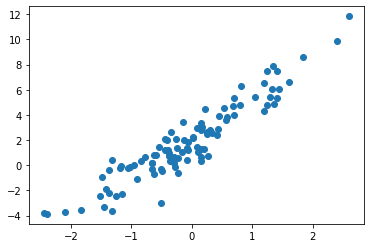

In [18]:
plt.scatter(X,y)

In [27]:
slope = tf.Variable(0,dtype=np.float64)
intercept = tf.Variable(0,dtype=np.float64)
max_iters = 300
lr = 0.01

In [30]:
@tf.function()
def fit(X,y):
    with tf.GradientTape() as tape:
        yh = X*slope + intercept
        error = yh-y
        loss = tf.reduce_mean(error**2)
    dm,dc = tape.gradient(loss,[slope,intercept])
    slope.assign_sub(dm*lr)
    intercept.assign_sub(dc*lr)
    return(loss)

In [31]:
#print the loss every 20 iterations
for i in range(max_iters):
    loss = fit(X,y)
    
    if i % 20 == 0:
        print("Loss at step {:03d}: {:.3f}".format(i, loss))
        
        
print(f'W : {slope.numpy()} , b  = {intercept.numpy()} ')

TypeError: in converted code:

    <ipython-input-25-c9673b722823>:4 fit  *
        yh = X*slope + intercept
    /home/azhad56/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/ops/math_ops.py:915 binary_op_wrapper
        return func(x, y, name=name)
    /home/azhad56/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/ops/math_ops.py:1201 _mul_dispatch
        return gen_math_ops.mul(x, y, name=name)
    /home/azhad56/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/ops/gen_math_ops.py:6125 mul
        "Mul", x=x, y=y, name=name)
    /home/azhad56/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/op_def_library.py:504 _apply_op_helper
        inferred_from[input_arg.type_attr]))

    TypeError: Input 'y' of 'Mul' Op has type float64 that does not match type float32 of argument 'x'.
